# Python Fundamentals

Some familiarity with Python is assumed for this course, but we'll review some of the key features of Python, and introduce a little bit of regression as well!

<img src="monty.jpg" alt="Monty Python!" style="width:550px;"/>

#### Goals for this notebook:

- Scalar types and mutability vs. immutability
- Variable name binding
- Advanced types: Lists, Tuples, Dictionaries, and Sets

---

- List comprehensions
- Sequence functions

---

- Matplotlib fundamentals

---

- Geopandas and pandas
- Loading, cleaning, and **merging** data
- Some simple regressions


#### Basic Libraries you should have:

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import geopandas as gpd

In [5]:
### We'll need this later in the course, so may as well install now:
#import tensorflow as tf

## Python Scalar Types

There are several basic single value *scalar* types in the standard Python library:


| Type | Description |
| :- | :- |
| `None` | NULL, Only a single instance of `None` exists
| `str` | String, UTF-8 encoded strings
| `bytes` | Raw ASCII bytes
| `float` | Double-precision (64-bit) float (no separate `double` type)
| `int` | Arbitrary precision signed integer
| `bool` | `True` or `False` boolean

**Scalar types are always *immutable***

In [6]:
#Make a float:
x = 1.1

#Look at the id in memory:
hex(id(x))

'0x207c7270c30'

In [7]:
#Now, do some arithmetic and look:
x = x + 1

#Different!
hex(id(x))

'0x207c8f50eb0'

In [8]:
# String are immutable:
#####

x = 'Monty'
y = 'Monty'

x is y


True

In [9]:
#And observe:
####

y = 'Monty'
print(hex(id(y)))

y = 'Monty' + ' Python'
print(hex(id(y)))

0x207c7377e70
0x207c8f7f2b0


In [10]:
### And note the following fails:
y[0] = '!'

TypeError: 'str' object does not support item assignment

## Typing and Variable Name Binding

- Everything in Python, including functions, etc. is a Python object, and has an associated type and internal data.


- Any time you assign a variable you are creating a *reference* to the object on the righthand side.  Assignment is also known as *binding*: **Binding a name to an object.**


- Python is a **strongly typed language**:  objects still have types and implicit conversions only occur in obvious cases.


- But the references to objects have no type, so you can do stuff like:

In [11]:
a = 5
print('I\'m a ', type(a), ', living at ', hex(id(a)))

a = 'I\'m a string now!'
print('I\'m a ', type(a), ', living at ', hex(id(a)))

I'm a  <class 'int'> , living at  0x207bd0e0170
I'm a  <class 'str'> , living at  0x207c77fe060


## Pass by reference/assignment

Python uses "pass by assignment"

- When passing variables to a function, *new local variables are created referencing the original objects*, without any copying

- If you bind a new object to a passed variable within the function, the change is *not* reflected in the parent scope

- However, you can alter *mutable* objects within the function and this *is* reflected in the parent scope

For example:

In [12]:
def foo1(x):
    x = x + 1
    
y = 2
foo1(y)
print(y) 

2


In [13]:
def foo2(x):
    x = [1, 2, 3]

y = [2]
foo2(y)
print(y)

[2]


In [14]:
def foo3(x):
    #Compare:
    x = x + [99]
    
    #To:
    x.append(99)

y = [2]
foo3(y)
print(y)

[2]


## Advanced variable types

- Lists
- Dictionaries
- Tuples
- Sets

### Lists

- Lists are an ordered array-like structure that is *mutable*. List elements can be of any type, including other lists, dictionary, and tuples

- Essential to be comfortable with **list comprehensions**

In [15]:
## Recall some extending/appending on lists:
a = [1, 2, 3]
b = [4, 5, 6]

In [16]:
a + b

[1, 2, 3, 4, 5, 6]

In [17]:
a + b*2

[1, 2, 3, 4, 5, 6, 4, 5, 6]

In [18]:
a.extend(b)
a

[1, 2, 3, 4, 5, 6]

In [19]:
a.append(b)
a

[1, 2, 3, 4, 5, 6, [4, 5, 6]]

### Dictionaries

Dictionaries are mutable list-like objects, declared using curly {}, define a set of key/value pairs

In [20]:
#Make a dictionary
my_dict = {'thing1':12.3, 'thing2':14, 'cat':'hat', 'yurtle':'turtle', 5:42}
my_dict

{'thing1': 12.3, 'thing2': 14, 'cat': 'hat', 'yurtle': 'turtle', 5: 42}

In [21]:
my_dict['thing1']

12.3

### Tuples

Tuples are ordered, *immutable* array-like objects. Declare with parentheses `()` or nothing at all!

- Recall tuple unpacking

In [22]:
#Can upack a tuple like so:
###

t = (4, 5, 6)

a, b, c = t
print(a,b,c)

4 5 6


In [23]:
#For a nested tuple:
###

t = 4, 5, (6, 7)

a, b, c = t

print(a, b, c)

4 5 (6, 7)


In [24]:
#OR

a, b, (c, d) = t
print(a, b, c, d)

4 5 6 7


### List Comprehension

The basic form of a list comprehension is:

```
[expr for val in collection if condition]
```

Which is equivalent to:

```
result = []
for val in collection:
    if condition:
        result.append(expr)
```

Don't necessarily need the condition, in which case we just append vals all together.

In [25]:
#Example: Square all odd numbers

[i**2 for i in [1,2,3,4,5] if i % 2 == 1]

[1, 9, 25]

## Sequence Functions

### enumerate

In [26]:

#When we use a for loop, we loop over an iterable object
#Often want to track index. Can do easily with:
L = [1, 2, 3, "hey", range(3)]

for index, value in enumerate(L):
    print("Index " + str(index) + " has value: " + str(value))

Index 0 has value: 1
Index 1 has value: 2
Index 2 has value: 3
Index 3 has value: hey
Index 4 has value: range(0, 3)


### zip
`zip` pairs elements of other sequences to create a list of tuples:

In [27]:
#Example:

seq1 = [1, 2, 3]
seq2 = ["one", "two", "three"]

zipped = zip(seq1, seq2)
print(zipped)

In [28]:
list(zipped)

[(1, 'one'), (2, 'two'), (3, 'three')]

### list comprehension + zip for list arithmetic:

In [29]:
a = [1, 2, 3]
b = [4, 5, 6]

[(i + j) for i, j in zip(a,b)]

[5, 7, 9]

## Also Remember:

- Control structures (if/else, loops, etc.)
- User-defined functions
- Anonymous (lambda) functions

# Plotting in Matplotlib

Let's review some of the fundamentals with plotting with matplotlib:

- Basic plots
- AxesSubplot/Axes object
- Some customization
- Advanced subplotting
- Colormaps and custom colormaps
- Annotation and text
- Custom legends
- Saving figures

<img src="matplotlib.png" alt="Matplotlib" style="width:250px;"/>


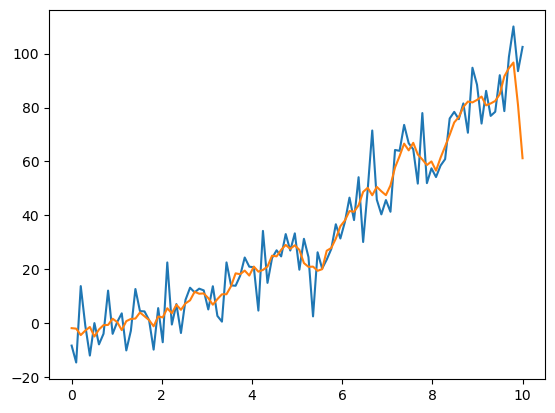

In [30]:
#Bare bones plot:
#######

#
x = np.linspace(0,10,100)
y = x**2 + np.random.normal(0,10,100)

#And the very basic plot
plt.plot(x, y)

#Filter the data with a square filter (convolution):
#Adopted from StackOverflow: https://stackoverflow.com/questions/14313510/how-to-calculate-rolling-moving-average-using-python-numpy-scipy
def moving_average(x, w):
    return np.convolve(x, np.ones(w) / w, mode='same')
    
#Adds a plot to same figure:
plt.plot(x, moving_average(y, 5));

### A Better Way: Use Axes/AxesSubplots

- Main container/interface for plotted data, axis ticks, labels, title, legend, etc.
- Use with multiple other plotting libraries that interface with matplotlib

Text(0, 0.5, 'lil y')

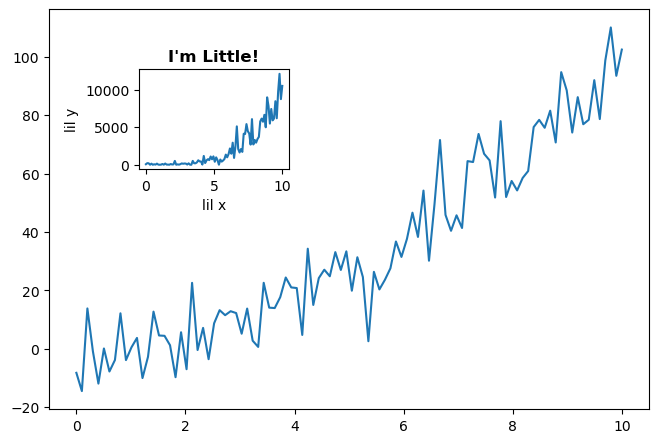

In [31]:
#add_axes:
##########

fig = plt.figure(figsize=(6, 4))

#xmin,ymin,dx,dy
ax1 = fig.add_axes([0, 0, 1, 1])

ax1.plot(x,y)

#xmin,ymin,dx,dy
#Add a smaller inset axis
ax2 = fig.add_axes([.15, .6, .25, .25])

ax2.plot(x,y**2)
ax2.set_title('I\'m Little!', fontweight='bold')
ax2.set_xlabel('lil x')
ax2.set_ylabel('lil y')

In [32]:
#Note: In latest version, need to install fiona and pyogrio BEFORE geopandas!
#####

#Some built-in geopandas teaching data:
#Recall we had:
import geopandas as gpd

#"gdf" is a common generic variable name = GeoDataFrame
gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


C:\Users\steff\AppData\Local\Temp\ipykernel_23912\2383556828.py:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


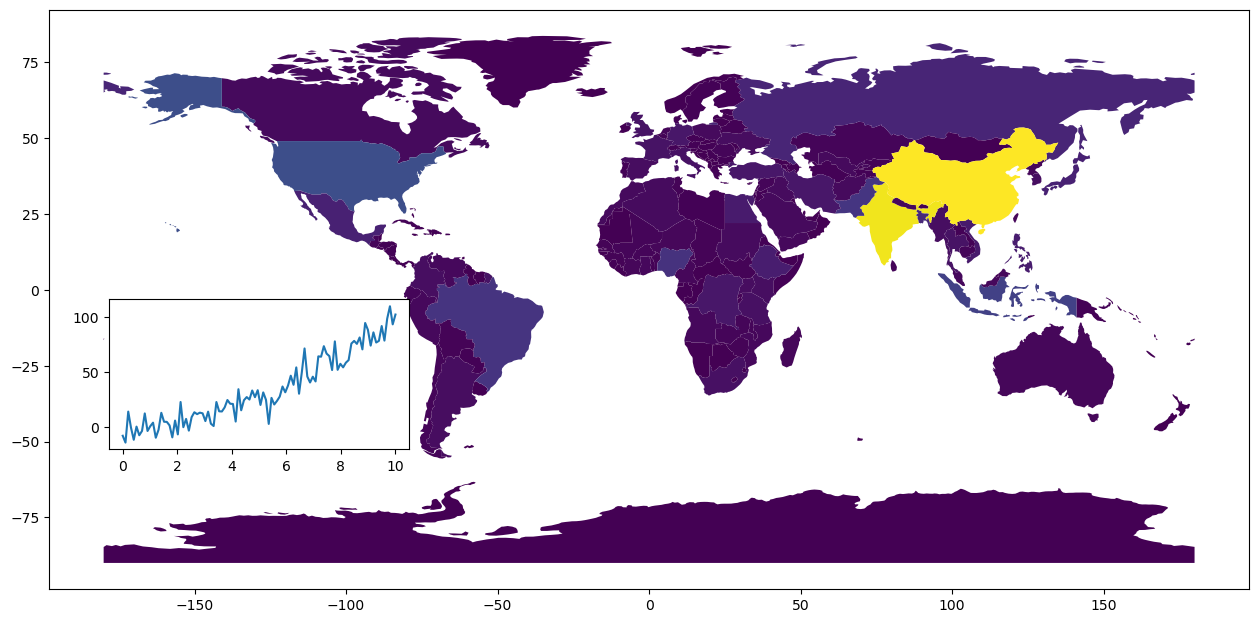

In [33]:
fig = plt.figure(figsize=(12, 6))

#xmin,ymin,dx,dyhttps://www.naturalearthdata.com/downloads/110m-cultural-vectors/
ax1 = fig.add_axes([0, 0, 1, 1])

#Plots a map automatically
gdf.plot(ax=ax1, column='pop_est')


#xmin,ymin,dx,dy
ax2 = fig.add_axes([.05, .25, .25, .25])
ax2.plot(x,y)



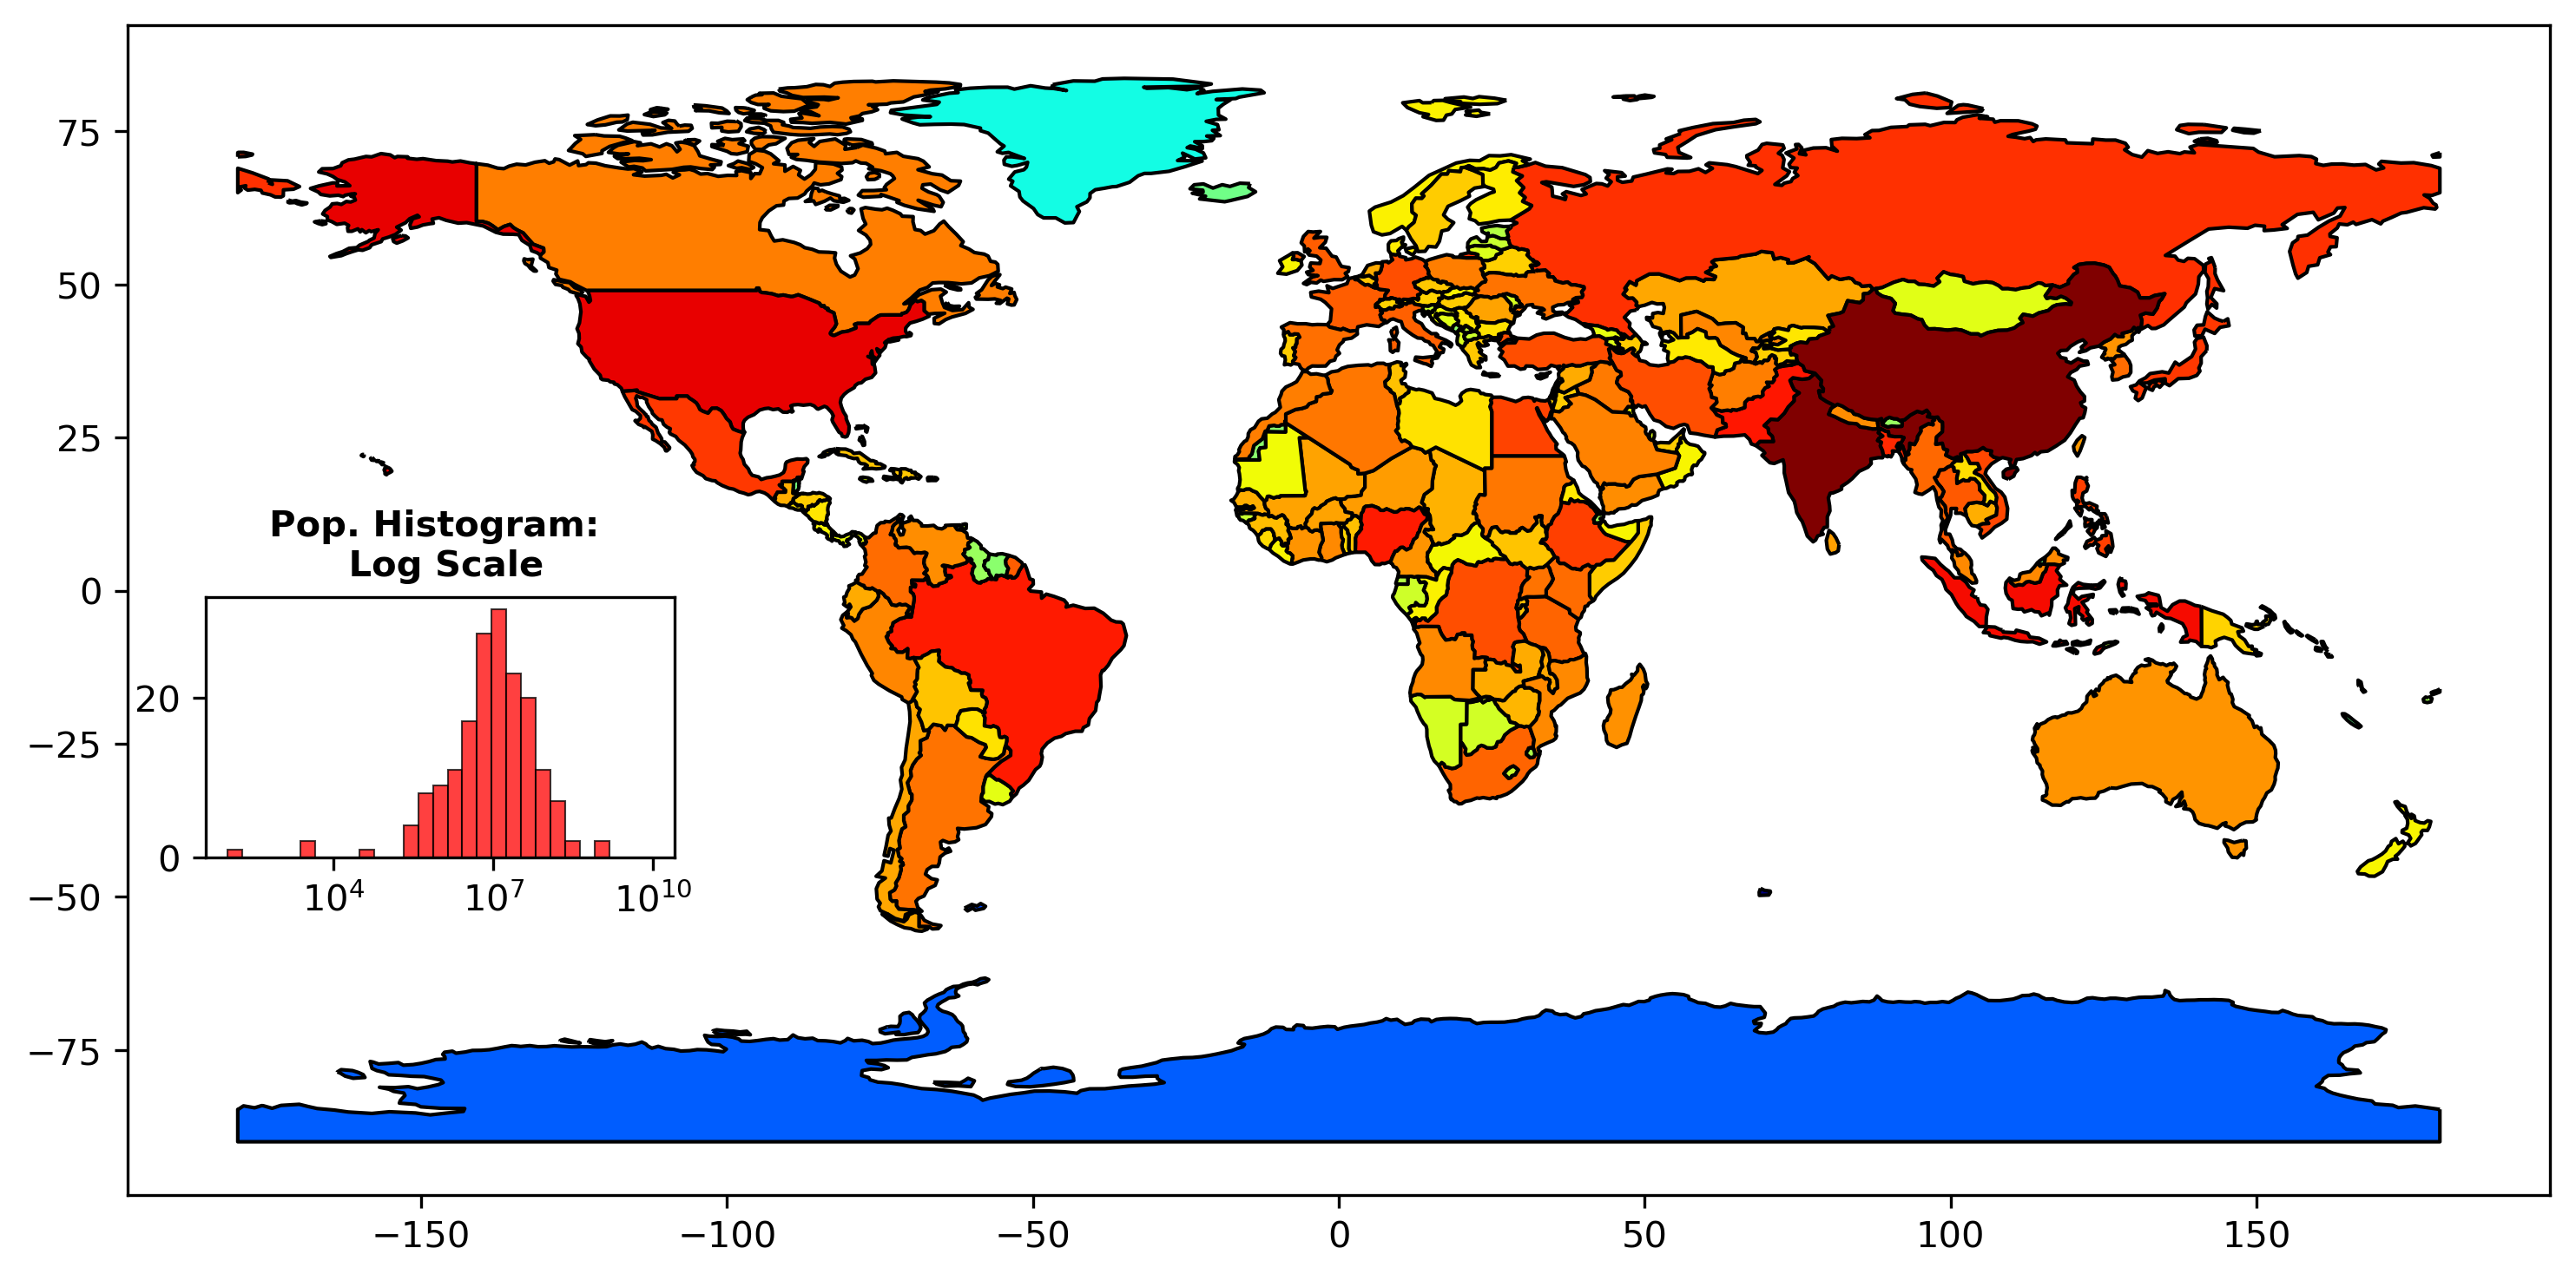

In [34]:
#Now let's inset a histogram of the population estimates:
##########

fig, ax1 = plt.subplots(1,1, figsize=(12, 10), dpi=300)

#Note the added alpha argument:
#Also, we'll use the LOG of population:
gdf.plot(ax = ax1, column = np.log10(gdf.pop_est), edgecolor='black', alpha=1, linewidth=1, cmap='jet')

#Make the inset_axes here:
axins = fig.add_axes([.15, .4, .15, .1])


if (0):
    n, bins, patches = axins.hist(gdf.pop_est, bins = 30, rwidth = 1, facecolor='red', \
                                edgecolor='black', linewidth = .5, alpha=0.75)

    #Set scale to LOG:
    axins.set_xscale('log')

else:
    my_bins = np.logspace(2,10,30)

    n, bins, patches = axins.hist(gdf.pop_est, bins = my_bins, rwidth = 1, facecolor='red', \
                                edgecolor='black', linewidth = .5, alpha=0.75)

    #Set scale to LOG:
    axins.set_xscale('log')
    
axins.set_title('Pop. Histogram: \n Log Scale', fontsize=10, fontweight='bold');


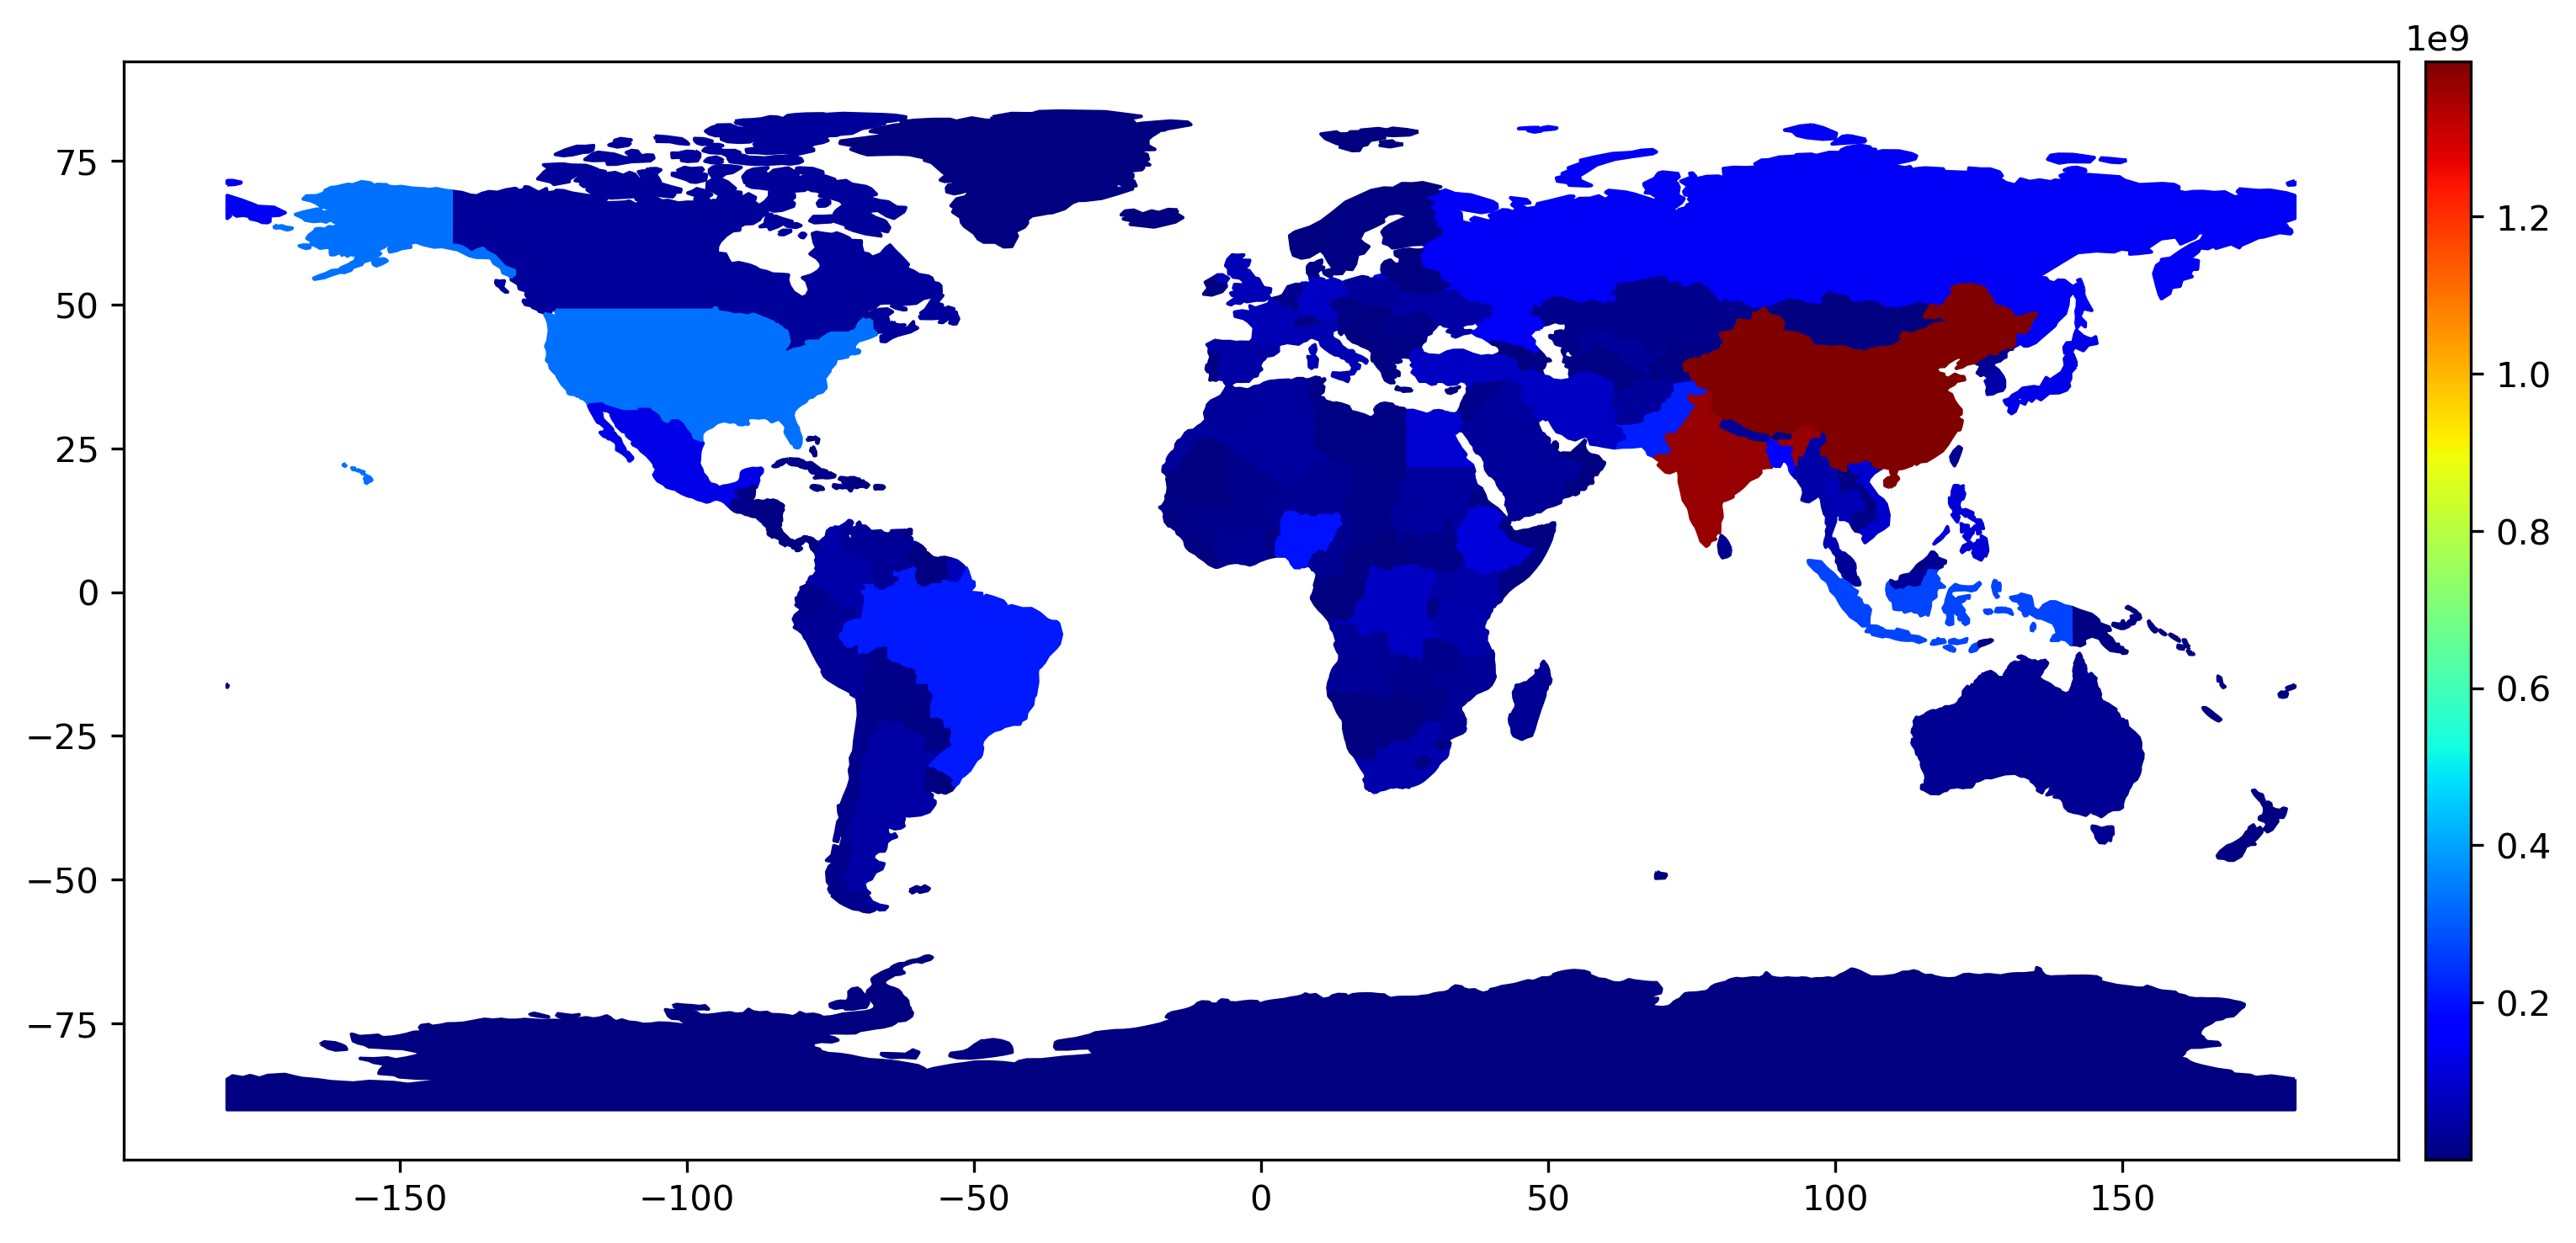

In [35]:
#Import and use make_axes_locatable:
######

from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax1 = plt.subplots(1,1, figsize=(12, 10), dpi=300)

#Pretty colorbar
divider = make_axes_locatable(ax1)
cax1 = divider.append_axes("right", size="2%", pad=0.1)

#Plot:
gdf.plot(ax=ax1, edgecolor='face', column='pop_est', cmap='jet', alpha=1,
                 legend=True, cax=cax1); #, legend_kwds={"orientation": "horizontal"})


### Scatter Plots and AxesSubplot/Axes Objects

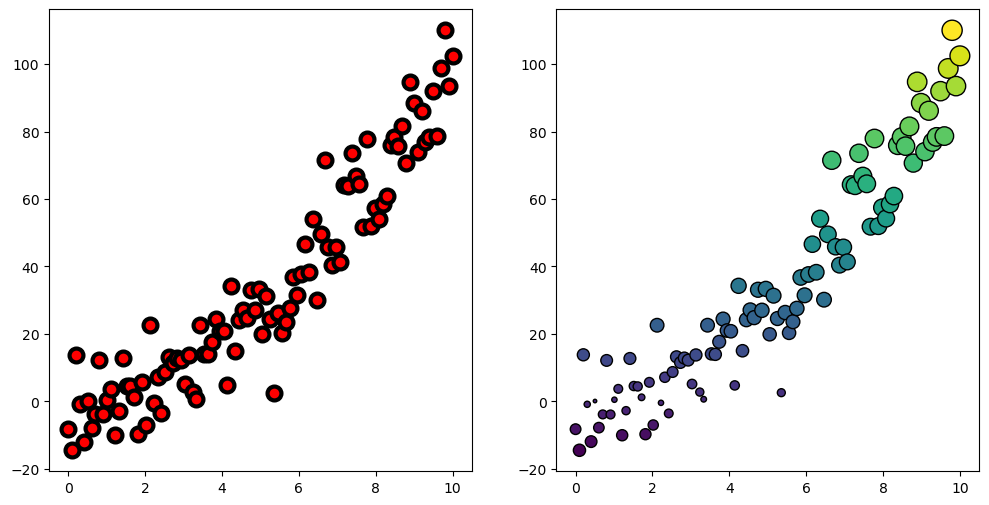

In [36]:
## Scatter Plots:

#Note the subplotting:

#We can make a "scatter plot" like this:
fig1, ax1 = plt.subplots(1, 2, figsize=(12, 6))

ax1[0].plot(x, y, 'o', markersize = 10, markerfacecolor='red', markeredgecolor='black', markeredgewidth=3)


#Or like this:
#Or use a designated scatter plot: 
ax1[1].scatter(x, y, c = y, s = np.sqrt(abs(y))*20 + 1, cmap='viridis', edgecolor='black')


In [38]:
type(ax1[0])

matplotlib.axes._axes.Axes

### Some more subplotting


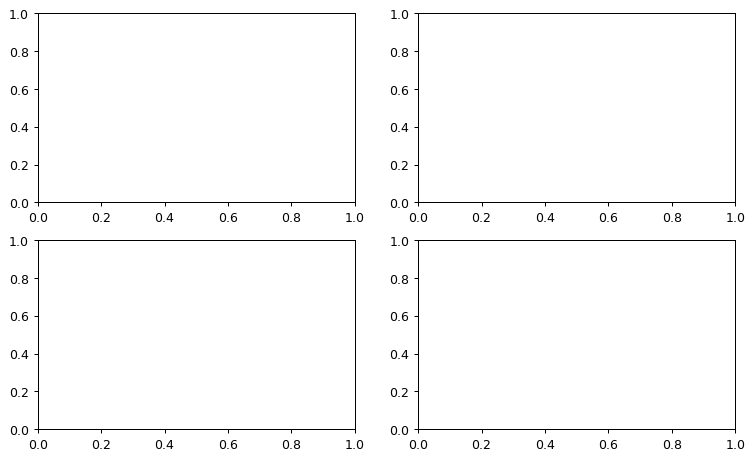

In [39]:
#Alternative subplot method
###########################

#Can set up grids of subplots using add_subplot:

#Start with a nice figure
fig = plt.figure(figsize=(10,6), dpi=90)

ax1 = fig.add_subplot(2, 2, 1) 
ax2 = fig.add_subplot(2, 2, 2)  
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)


Text(0.5, 0.98, 'There Can Be Only One')

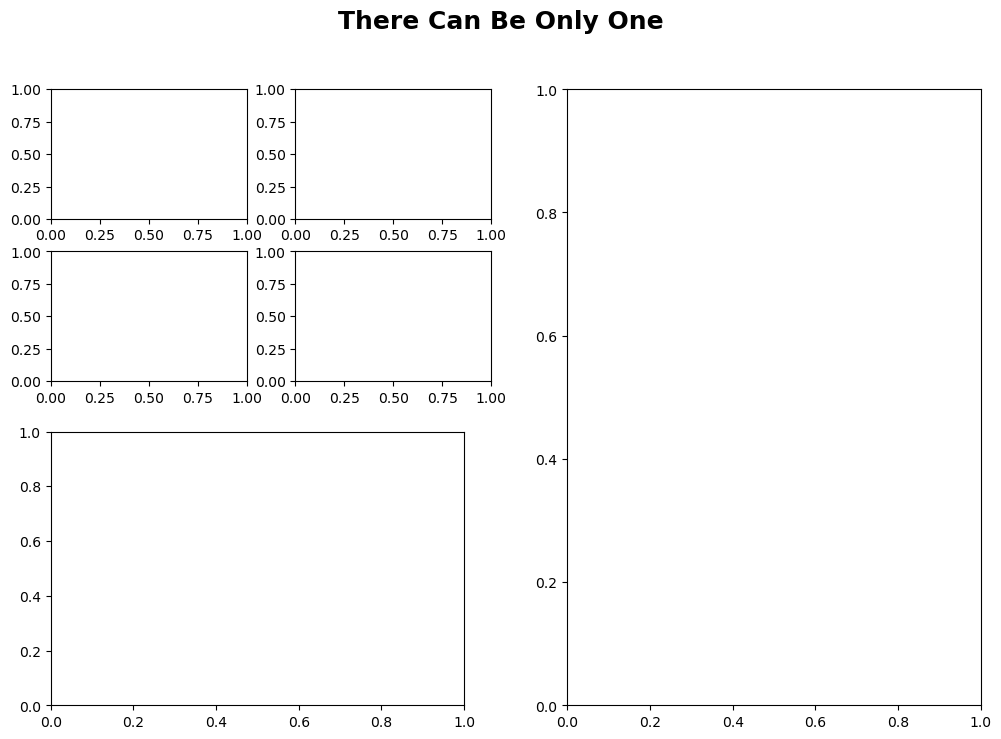

In [40]:
#This style is more useful in creating custom grids:
#Example:

fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(4, 4, 1) 
ax2 = fig.add_subplot(4, 4, 2)
ax3 = fig.add_subplot(4, 4, 5)
ax4 = fig.add_subplot(4, 4, 6)

ax5 = fig.add_subplot(2, 2, 3)
ax6 = fig.add_subplot(1, 2, 2)


#Again, we can also adjust space around subplots:
###
plt.subplots_adjust(wspace=0.25, hspace=0.25)

#And add one title to rule them all!
####
plt.suptitle('There Can Be Only One', fontweight='bold', fontsize=18)

# Pandas Review

- The `pandas` library is our fundamental library for working with tabular data/data frames.

- Pandas is often used with numerical computing tools NumPy and SciPy, analytical libraries like scikit-learn, and data visualization libraries such as matplotlib

- Adopts parts of NumPy's style for array-based computing and data processing without `for` loops

<br>

<img src="panda.png" alt="Panda!" style="width:375px;"/>

<br>


## Series

The two fundamental data structures in pandas are the

1. **Series**
2. **DataFrame**

A **Series** is a 1-D array-like object consisting of a sequence of values (types similar to NumPy types) + an array of data labels called its ***index***. Similar to a dictionary key:value pairing, but ordered.

In [41]:
#Example:

#Make a Series s with alphabetic index
s = pd.Series([1, 3, 5, 7, 9], index = list('abcde'))
s


a    1
b    3
c    5
d    7
e    9
dtype: int64

### Selection with loc and iloc

Select subsets of rows and columns using either axis labels (`loc`) or integer index (`iloc`)
- `loc`: Strictly label-based access
- `iloc`: Strictly integer-based access

In [42]:
s.loc['a':'c']

a    1
b    3
c    5
dtype: int64

In [43]:
s.iloc[0:2]

a    1
b    3
dtype: int64

### Boolean Masking

Similar to NumPy...

**Note that masking, filtering, scalar multiplication, and math functions all preserve index-value link**


In [44]:
s > 3

a    False
b    False
c     True
d     True
e     True
dtype: bool

In [45]:
s[s > 3]

c    5
d    7
e    9
dtype: int64

In [46]:
#OR (better):
s.loc[s > 3]

c    5
d    7
e    9
dtype: int64

## DataFrame

Rectangular table of data, where each column can be a different data type.

- Both row and column index
- Can also think of as a dictionary of Series that all share the same index (if you really want to)

Consider our GeoDataFrame from above:

In [47]:
gdf.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [48]:
#Can do filtering with boolean masking:
######

gdf.loc[gdf.continent == 'North America']

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
16,11263077.0,North America,Haiti,HTI,14332,"POLYGON ((-71.71236 19.71446, -71.62487 19.169..."
17,10738958.0,North America,Dominican Rep.,DOM,88941,"POLYGON ((-71.70830 18.04500, -71.68774 18.316..."
19,389482.0,North America,Bahamas,BHS,13578,"MULTIPOLYGON (((-78.98000 26.79000, -78.51000 ..."
22,56225.0,North America,Greenland,GRL,3051,"POLYGON ((-46.76379 82.62796, -43.40644 83.225..."
27,127575529.0,North America,Mexico,MEX,1268870,"POLYGON ((-117.12776 32.53534, -115.99135 32.6..."
33,4246439.0,North America,Panama,PAN,66800,"POLYGON ((-77.35336 8.67050, -77.47472 8.52429..."
34,5047561.0,North America,Costa Rica,CRI,61801,"POLYGON ((-82.54620 9.56613, -82.93289 9.47681..."
35,6545502.0,North America,Nicaragua,NIC,12520,"POLYGON ((-83.65561 10.93876, -83.89505 10.726..."


In [49]:
#Another example:
######

gdf.loc[(gdf.pop_est > 1e5) & (gdf.pop_est < 1e6)]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
19,389482.0,North America,Bahamas,BHS,13578,"MULTIPOLYGON (((-78.98000 26.79000, -78.51000 ..."
39,390353.0,North America,Belize,BLZ,1879,"POLYGON ((-89.14308 17.80832, -89.15091 17.955..."
41,782766.0,South America,Guyana,GUY,5173,"POLYGON ((-56.53939 1.89952, -56.78270 1.86371..."
42,581363.0,South America,Suriname,SUR,3697,"POLYGON ((-54.52475 2.31185, -55.09759 2.52375..."
89,299882.0,Oceania,Vanuatu,VUT,934,"MULTIPOLYGON (((167.21680 -15.89185, 167.84488..."
100,763092.0,Asia,Bhutan,BTN,2530,"POLYGON ((91.69666 27.77174, 92.10371 27.45261..."
128,619896.0,Europe,Luxembourg,LUX,71104,"POLYGON ((6.04307 50.12805, 6.24275 49.90223, ..."
134,287800.0,Oceania,New Caledonia,NCL,10770,"POLYGON ((165.77999 -21.08000, 166.59999 -21.7..."


In [50]:
#If we grab columns, these are Series:
######

gdf['pop_est']

0         889953.0
1       58005463.0
2         603253.0
3       37589262.0
4      328239523.0
          ...     
172      6944975.0
173       622137.0
174      1794248.0
175      1394973.0
176     11062113.0
Name: pop_est, Length: 177, dtype: float64

In [51]:
#Unless we pass a list with a single item:
######

gdf[['pop_est']]

,pop_est
0,889953.0
1,58005463.0
2,603253.0
3,37589262.0
4,328239523.0
...,...
172,6944975.0
173,622137.0
174,1794248.0
175,1394973.0


In [52]:
#To get as numpy:
######

gdf['pop_est'].values

array([8.89953000e+05, 5.80054630e+07, 6.03253000e+05, 3.75892620e+07,
       3.28239523e+08, 1.85139300e+07, 3.35806500e+07, 8.77610900e+06,
       2.70625568e+08, 4.49387120e+07, 1.89520380e+07, 8.67905670e+07,
       1.01923173e+07, 5.25739730e+07, 4.28132380e+07, 1.59468760e+07,
       1.12630770e+07, 1.07389580e+07, 1.44373535e+08, 3.89482000e+05,
       3.39800000e+03, 5.34789600e+06, 5.62250000e+04, 1.40000000e+02,
       1.29311900e+06, 5.85582700e+07, 2.12526800e+06, 1.27575529e+08,
       3.46173400e+06, 2.11049527e+08, 1.15131000e+07, 3.25104530e+07,
       5.03394430e+07, 4.24643900e+06, 5.04756100e+06, 6.54550200e+06,
       9.74611700e+06, 6.45355300e+06, 1.66040260e+07, 3.90353000e+05,
       2.85158290e+07, 7.82766000e+05, 5.81363000e+05, 6.70598870e+07,
       1.73736620e+07, 3.19369400e+06, 2.94827900e+06, 1.13334830e+07,
       1.46454680e+07, 2.30369700e+06, 2.49453000e+06, 1.62963640e+07,
       1.96580310e+07, 4.52569600e+06, 1.18011510e+07, 2.33107150e+07,
      

In [53]:
### Also note:
gdf['pop_est'].values.shape

(177,)

In [54]:
gdf[['pop_est']].values.shape

(177, 1)

In [55]:
gdf['pop_est'].values.reshape(-1,1).shape

(177, 1)

## Merging/Joining + Cleaning Data

- We'll get a couple datasets on life satisfaction and GDP from the World Bank
- Join with our maps dataframe
- Do some cleaning

## Get Life Satisfaction data from the OECD

- https://stats.oecd.org/Index.aspx?DataSetCode=BLI

- Let's download as a CSV file, and load with Pandas

In [56]:
#Call it df_bli:
df_bli = pd.read_csv('Data/BLI_Data.csv')

In [57]:
#What have we?
df_bli

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.1,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.3,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.4,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.8,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.3,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364,CRI,Costa Rica,PS_REPH,Homicide rate,L,Value,MN,Men,RATIO,Ratio,0,Units,NaN,NaN,18.2,NaN,NaN
2365,CRI,Costa Rica,PS_REPH,Homicide rate,L,Value,WMN,Women,RATIO,Ratio,0,Units,NaN,NaN,1.8,NaN,NaN
2366,CRI,Costa Rica,WL_EWLH,Employees working very long hours,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,22.0,NaN,NaN
2367,CRI,Costa Rica,WL_EWLH,Employees working very long hours,L,Value,MN,Men,PC,Percentage,0,Units,NaN,NaN,27.9,NaN,NaN


In [63]:
#What type of columns do we have?
#Note that this itself is a Series
df_bli.dtypes

LOCATION                  object
Country                   object
INDICATOR                 object
Indicator                 object
MEASURE                   object
Measure                   object
INEQUALITY                object
Inequality                object
Unit Code                 object
Unit                      object
PowerCode Code             int64
PowerCode                 object
Reference Period Code    float64
Reference Period         float64
Value                    float64
Flag Codes               float64
Flags                    float64
dtype: object

In [65]:
##
type(df_bli.dtypes)

pandas.core.series.Series

In [66]:
## Unique Indicators?
df_bli.Indicator.unique()

array(['Labour market insecurity',
       'Stakeholder engagement for developing regulations',
       'Dwellings without basic facilities', 'Housing expenditure',
       'Feeling safe walking alone at night', 'Rooms per person',
       'Household net adjusted disposable income', 'Household net wealth',
       'Employment rate', 'Long-term unemployment rate',
       'Personal earnings', 'Quality of support network',
       'Educational attainment', 'Student skills', 'Years in education',
       'Air pollution', 'Water quality', 'Voter turnout',
       'Life expectancy', 'Self-reported health', 'Life satisfaction',
       'Homicide rate', 'Employees working very long hours',
       'Time devoted to leisure and personal care'], dtype=object)

In [67]:
## Let's look at "Life satisfaction"
df_bli.loc[df_bli.Indicator == 'Life satisfaction']

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
1722,AUS,Australia,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.1,NaN,NaN
1723,AUT,Austria,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.2,NaN,NaN
1724,BEL,Belgium,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,6.8,NaN,NaN
1725,CAN,Canada,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.0,NaN,NaN
1726,CZE,Czech Republic,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,6.9,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358,CRI,Costa Rica,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,6.3,NaN,NaN
2359,CRI,Costa Rica,SW_LIFS,Life satisfaction,L,Value,MN,Men,AVSCORE,Average score,0,Units,NaN,NaN,6.2,NaN,NaN
2360,CRI,Costa Rica,SW_LIFS,Life satisfaction,L,Value,WMN,Women,AVSCORE,Average score,0,Units,NaN,NaN,6.5,NaN,NaN
2361,CRI,Costa Rica,SW_LIFS,Life satisfaction,L,Value,HGH,High,AVSCORE,Average score,0,Units,NaN,NaN,7.1,NaN,NaN


In [68]:
#Looks like "Inequality" can be either "Men," "Women," or "Total"
#Let's filter down to just Total
df_filtered = df_bli.loc[df_bli.Indicator == 'Life satisfaction'].loc[df_bli.Inequality == 'Total']

In [69]:
#What's our shape?
df_filtered.shape

(42, 17)

In [70]:
#And our locations?
#Note we have OECD as one
df_filtered[['LOCATION', 'Country']]

,LOCATION,Country
1722,AUS,Australia
1723,AUT,Austria
1724,BEL,Belgium
1725,CAN,Canada
1726,CZE,Czech Republic
1727,DNK,Denmark
1728,FIN,Finland
1729,FRA,France
1730,DEU,Germany
1731,GRC,Greece


### Aside: What if we wanted two indicators?

- In this case we probably want to pivot our DataFrame wider
- Observe:

In [74]:
## Filter to two indicators:
df_filtered2 = df_bli.loc[(df_bli.Indicator == 'Life satisfaction') | (df_bli.Indicator == 'Employment rate')].loc[df_bli.Inequality == 'Total']
df_filtered2.shape

In [77]:
df_filtered2

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
360,AUS,Australia,JE_EMPL,Employment rate,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,73.0,NaN,NaN
361,AUT,Austria,JE_EMPL,Employment rate,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,72.0,NaN,NaN
362,BEL,Belgium,JE_EMPL,Employment rate,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,65.0,NaN,NaN
363,CAN,Canada,JE_EMPL,Employment rate,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,70.0,NaN,NaN
364,CZE,Czech Republic,JE_EMPL,Employment rate,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,74.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,LTU,Lithuania,JE_EMPL,Employment rate,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,72.0,NaN,NaN
2298,COL,Colombia,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,5.7,NaN,NaN
2299,LTU,Lithuania,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,6.4,NaN,NaN
2328,CRI,Costa Rica,JE_EMPL,Employment rate,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,55.0,NaN,NaN


In [81]:
#Pivot:
######

df_pivot = df_filtered2.pivot(index='LOCATION', columns='Indicator', values='Value')
df_pivot

Indicator,Employment rate,Life satisfaction
LOCATION,,
AUS,73.0,7.1
AUT,72.0,7.2
BEL,65.0,6.8
BRA,57.0,6.1
CAN,70.0,7.0
CHE,80.0,7.5
CHL,56.0,6.2
COL,58.0,5.7
CRI,55.0,6.3


In [84]:
#To reset the index:
df_pivot.reset_index()

Indicator,LOCATION,Employment rate,Life satisfaction
0,AUS,73.0,7.1
1,AUT,72.0,7.2
2,BEL,65.0,6.8
3,BRA,57.0,6.1
4,CAN,70.0,7.0
5,CHE,80.0,7.5
6,CHL,56.0,6.2
7,COL,58.0,5.7
8,CRI,55.0,6.3
9,CZE,74.0,6.9


## Merge to Map!

- For a merge we join two datasets based on a **key**
- Basic joins = inner, outer, left, and right

Let's do an **inner** vs. **left** join:

In [85]:
### The merge/join:
gdf_merged = gdf.merge(df_filtered, left_on='iso_a3', right_on='LOCATION', how='left')

In [86]:
gdf_merged.shape

(177, 23)

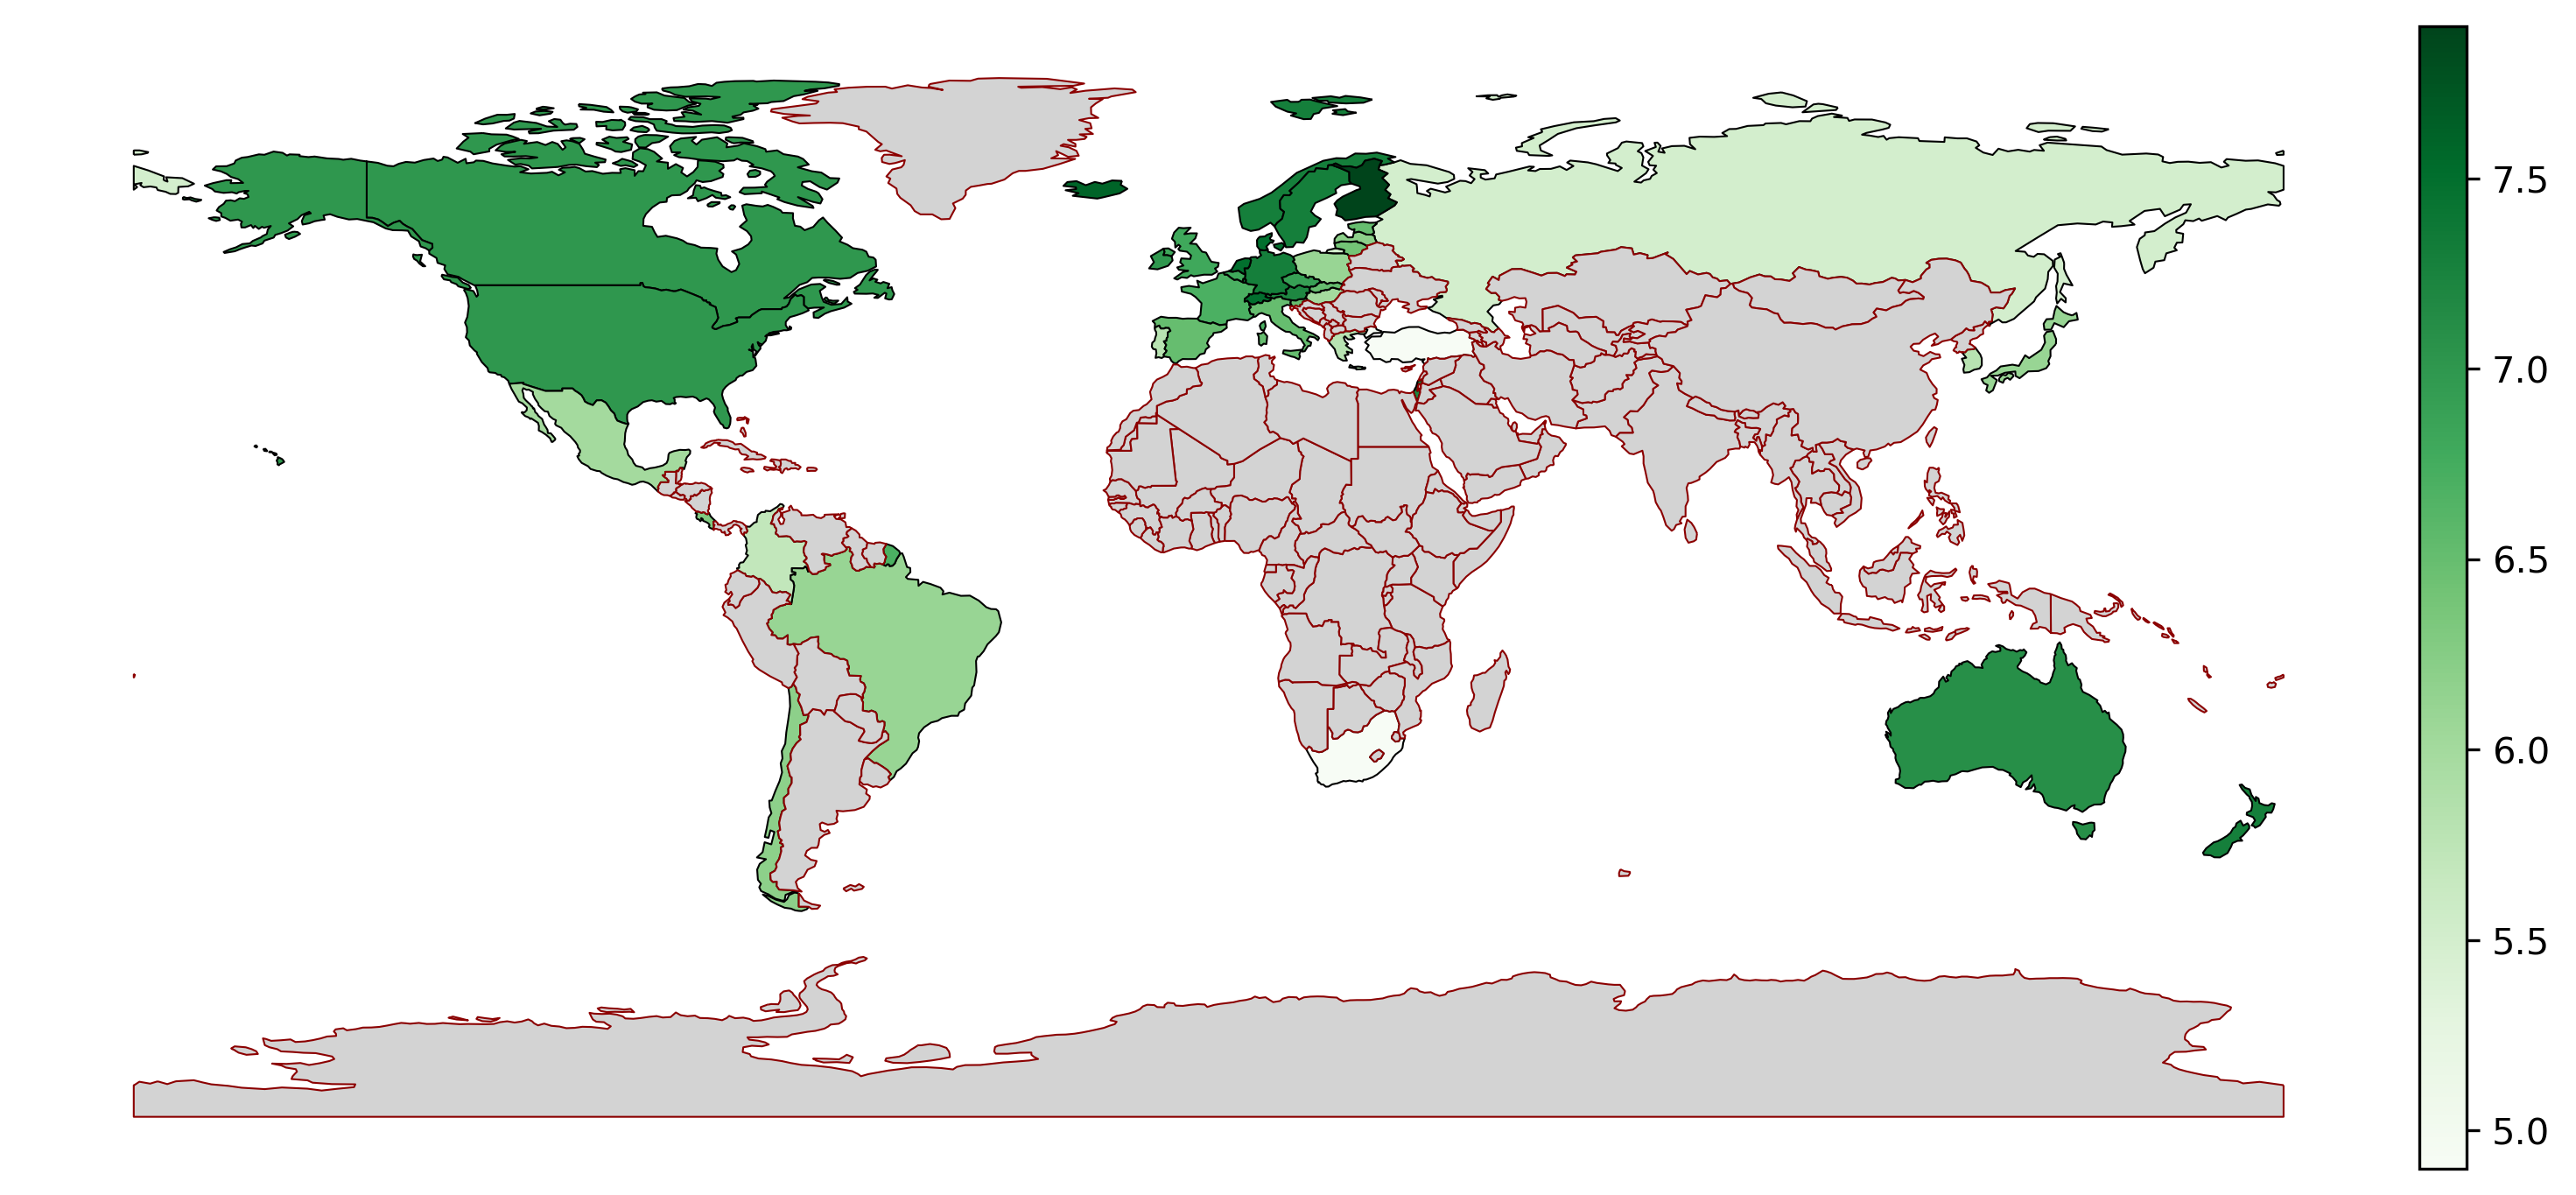

In [88]:
#Let's plot the Value:
fig, ax1 = plt.subplots(1,1, figsize=(12, 10), dpi=300)

#For the pretty colorbar
divider = make_axes_locatable(ax1)
cax1 = divider.append_axes("right", size="2%", pad=0.1)

#Note the missing_kwds
gdf_merged.plot(ax = ax1, column = 'Value', edgecolor='black', alpha=1, linewidth=.5, cmap='Greens',
                missing_kwds={"color": "lightgrey", "edgecolor": "darkred", "hatch": "", "label": "Missing values"},
                cax=cax1, legend=True);

ax1.set_axis_off()

### We Ask: How does GDP per capita relate to life satisfaction?

In [89]:
#Make a New column for GDP per capita:
#############

gdf_merged['GDP_Per_Cap'] = gdf_merged.gdp_md_est / gdf_merged.pop_est * 1e6

In [90]:
#Make another GeoDataFrame that drops all the NA
#Also sort by GDP_Per_Cap:
gdf_merged_noNaN = gdf_merged.dropna(subset = ['Value']).sort_values(by = 'GDP_Per_Cap')

Text(0, 0.5, 'Life Satisfaction')

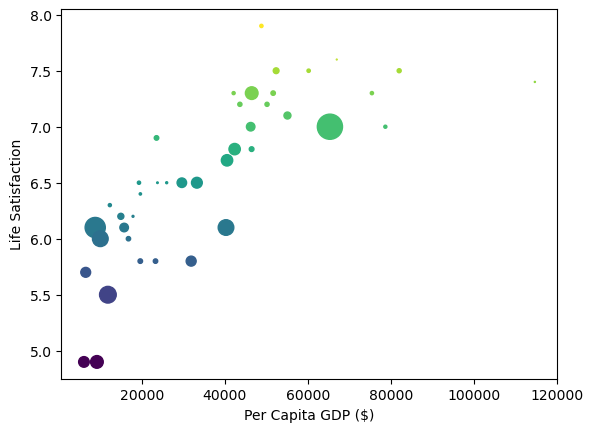

In [91]:
#And let's see how these correlate:

#Note, we size by population and color by Value:
plt.scatter(gdf_merged_noNaN.GDP_Per_Cap, gdf_merged_noNaN.Value, s=gdf_merged_noNaN.pop_est/1e6, c=gdf_merged_noNaN.Value)
plt.xlabel('Per Capita GDP ($)')
plt.ylabel('Life Satisfaction')

### Get and Clean World Bank Data Too

- Before we move onto regression and a few more plots, let's get some World Bank data on per capita GDP
- https://data.worldbank.org/indicator/NY.GDP.PCAP.CD
- We'll intentionally dirty this data a little bit first, just so we can practice cleaning it
- (Re-)introduce `apply()` and `applymap()` methods

In [101]:
#Note the header argument:
df_wb = pd.read_csv('Data/GDP_World_Bank.csv', header=4)

In [102]:
#See what we got:
#####

df_wb

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,26515.678080,26942.307980,28421.386490,28451.273740,29326.708060,30918.515220,31902.762580,24487.863570,29342.100730,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,161.638982,161.111657,170.538537,198.038919,178.019217,196.818756,...,1736.222507,1724.534381,1545.559084,1436.094404,1613.668488,1550.111762,1499.954437,1353.927527,1539.165543,1622.391720
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,...,651.987862,628.146804,592.476165,520.251955,530.149863,502.057099,500.522981,516.866797,363.674087,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,107.423775,112.503866,118.197351,122.774120,131.163760,137.809818,...,2153.766138,2247.857492,1880.750778,1646.972399,1588.581005,1732.816544,1810.538006,1686.997899,1765.965307,1790.348800
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5101.983876,5059.080441,3100.830685,1709.515534,2283.214233,2487.500996,2142.238757,1502.950754,1903.717405,2998.501158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3704.562199,3902.529820,3520.780421,3759.471040,4009.356038,4384.190404,4416.031322,4310.932984,5269.783901,5351.439542
262,"Yemen, Rep.",YEM,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1497.747941,1557.601406,1488.416267,1069.816997,893.716573,701.714878,693.816484,583.875663,603.707959,676.928385
263,South Africa,ZAF,GDP per capita (current US$),NY.GDP.PCAP.CD,529.561923,543.042224,560.699395,601.599951,642.688431,681.131112,...,7441.230854,6965.137897,6204.929901,5735.066787,6734.475153,7048.508112,6688.774746,5741.641249,7055.055176,6776.480077
264,Zambia,ZMB,GDP per capita (current US$),NY.GDP.PCAP.CD,228.567398,216.274674,208.562685,209.453362,236.941713,296.022427,...,1840.320553,1724.576220,1307.909649,1249.923143,1495.752138,1475.199836,1268.120941,956.831748,1137.344395,1487.907764


In [104]:
#Our types?
df_wb.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2018              float64
2019              float64
2020              float64
2021              float64
2022              float64
Length: 67, dtype: object

In [105]:
#Now, let's add commas and dollar signs in the year columns:
########

#We can add commas like so:
####
format(df_wb['2022'].values[1], ',f')


'1,622.391720'

In [106]:
#Do it to everything in one column:
########

df_wb['2022'].apply(lambda x: format(x, ',f')) #[0]

0               nan
1      1,622.391720
2               nan
3      1,790.348800
4      2,998.501158
           ...     
261    5,351.439542
262      676.928385
263    6,776.480077
264    1,487.907764
265    1,266.996031
Name: 2022, Length: 266, dtype: object

In [107]:
##And to all of the columns:
#######

df_wb.loc[:,'1960':'2022'] = df_wb.loc[:,'1960':'2022'].applymap(lambda x: format(x, ',f'))


In [108]:
#Now we have objects (strings):
df_wb.dtypes

Country Name      object
Country Code      object
Indicator Name    object
Indicator Code    object
1960              object
                   ...  
2018              object
2019              object
2020              object
2021              object
2022              object
Length: 67, dtype: object

In [109]:
#And now, let's add dollar signs!
########

df_wb.loc[:,'1960':'2022'] = df_wb.loc[:,'1960':'2022'].applymap(lambda x: '$' + x if x != 'nan' else x)

In [227]:
## And save our intentionally inferior data back to file:
#########

#Note the index=False argument
df_wb.to_csv('Data/GDP_World_Bank_Dirty.csv', index=False)

### Load and Clean:

We'll strip out the $ and , and then convert to a float/numeric

In [111]:
df_wb = pd.read_csv('Data/GDP_World_Bank_Dirty.csv')

In [112]:
#Note we actually get a mix of types when we load back in:
x = df_wb['1960'].values
x

array([nan, '$161.638982', '$62.369375', '$107.423775', nan, nan, nan,
       nan, nan, nan, nan, nan, nan, '$1,810.597443', '$935.460427', nan,
       '$71.360224', '$1,273.691659', '$90.035831', '$69.083195',
       '$84.825334', nan, nan, '$1,483.003682', nan, nan, '$307.128629',
       '$1,902.402119', '$101.690810', '$232.998762', nan, nan, nan,
       '$59.297122', '$66.770095', '$2,259.288302', nan, '$1,787.360378',
       nan, '$504.801138', '$89.520218', '$147.277834', '$120.018194',
       '$219.905827', '$124.782359', '$256.962847', nan, nan,
       '$376.968786', '$446.724344', nan, nan, nan, nan, nan, nan, nan,
       nan, nan, '$203.879751', '$239.033006', '$90.719212',
       '$153.477606', '$148.212965', nan, nan, '$448.114882', nan,
       '$923.044701', nan, '$396.392253', nan, nan, nan, nan,
       '$1,179.353011', '$279.534498', '$1,333.881573', nan, nan,
       '$275.585338', '$1,397.594863', nan, '$176.116376', nan, nan, nan,
       nan, nan, '$520.322744', nan, n

In [115]:
#We have floats (NaNs)
type(x[0])

float

In [159]:
#And strings:
type(x[1])

str

In [160]:
#Object data type:
x.dtype

dtype('O')

In [116]:
#Can get rid of $ and commas like so:
#########

df_wb['2020'].apply(lambda x: x.replace('$','').replace(',','') if type(x) == str else np.NaN)

0      24487.863570
1       1353.927527
2        516.866797
3       1686.997899
4       1502.950754
           ...     
261     4310.932984
262      583.875663
263     5741.641249
264      956.831748
265     1372.696674
Name: 2020, Length: 266, dtype: object

In [117]:
#Or, a little easier, and for all:
#########

df_wb.loc[:,'1960':'2022'] = df_wb.loc[:,'1960':'2022'].replace({'\$':'', ',':''}, regex=True) 

In [125]:
###And now we can convert everything to a float:
#######

#This doesn't work
#df_wb.loc[:,'1960':'2022'] = df_wb.loc[:,'1960':'2022'].astype(np.float64)

#This does:
df_wb[df_wb.columns[4:]] = df_wb[df_wb.columns[4:]].astype(np.float64)

In [129]:
###Alternative:
#######

df_wb[df_wb.columns[4:]] = df_wb[df_wb.columns[4:]].applymap(pd.to_numeric)

#df_wb.loc[:,'1960':'2022'] = df_wb.loc[:,'1960':'2022'].applymap(pd.to_numeric)

In [130]:
#We get, for example:
df_wb['2022']

0              NaN
1      1622.391720
2              NaN
3      1790.348800
4      2998.501158
          ...     
261    5351.439542
262     676.928385
263    6776.480077
264    1487.907764
265    1266.996031
Name: 2022, Length: 266, dtype: float64

### Merge Again and Plot, Again

- Left join GDP onto our map

In [131]:
#Let's do a left join:

gdf_merged2 = gdf_merged.merge(df_wb, left_on = 'iso_a3', right_on = 'Country Code', how = 'left')

In [132]:
gdf_merged2.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,LOCATION,Country,INDICATOR,Indicator,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,NaN,NaN,...,4586.956165,5305.063400,5105.190039,5368.433659,5825.198813,6073.395195,5968.319557,4864.106008,4646.537921,5316.658385
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN,NaN,NaN,...,955.321289,1012.984741,929.107239,942.881348,975.924560,1011.599670,1050.932373,1104.164429,1146.031982,1192.403809
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",CAN,Canada,SW_LIFS,Life satisfaction,...,52635.174960,50955.998320,43596.135540,42315.603710,45129.429300,46547.795180,46374.152750,43349.677860,52358.621640,54966.488840
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",USA,United States,SW_LIFS,Life satisfaction,...,53291.127690,55123.849790,56762.729450,57866.744930,59907.754260,62823.309440,65120.394660,63528.634300,70219.472450,76398.591740


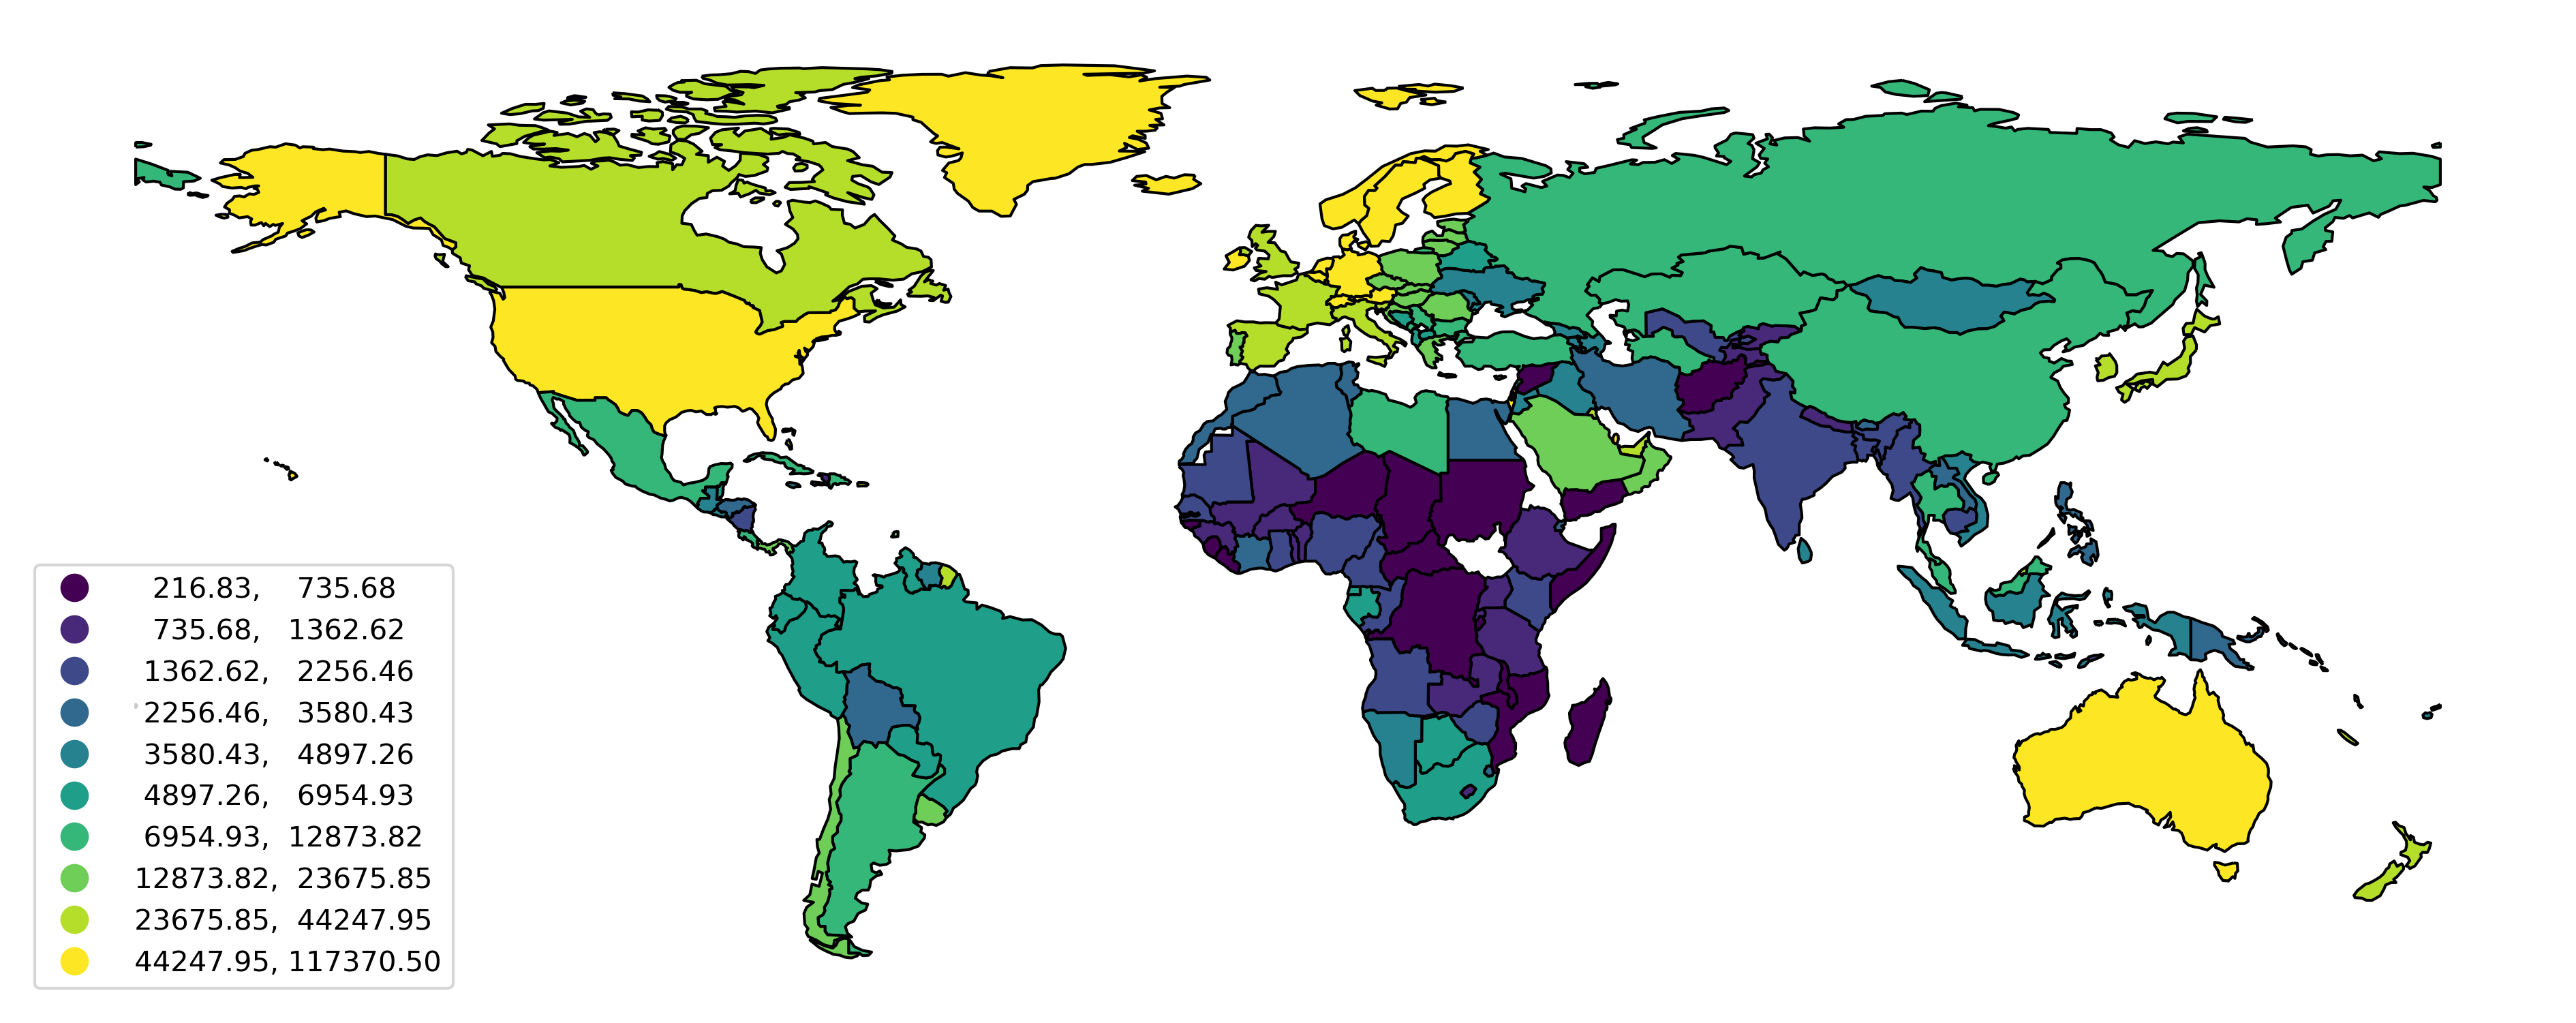

In [136]:
#And let's plot the per Capita GDP, per the World Bank:
fig, ax1 = plt.subplots(1,1, figsize=(16, 10), dpi=300)

gdf_merged2.plot(ax = ax1, column = '2020', edgecolor='black', alpha=1, linewidth=1, scheme='quantiles', k=10,
                 legend=True, legend_kwds = {'loc':'lower left'})

ax1.set_axis_off()

## Scatter Plots Again!


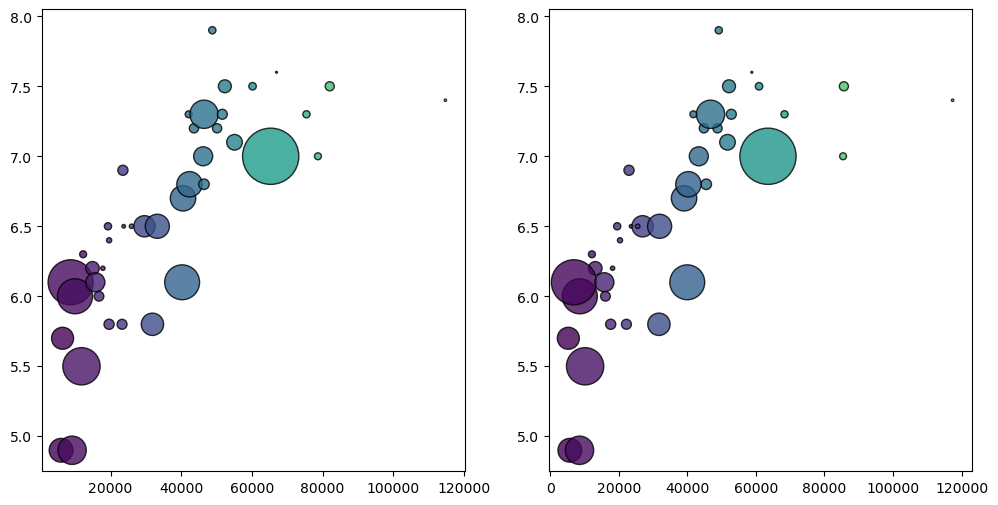

In [137]:
#Let's compare the data that with our Natural Earth Dataset to what we grabbed from the World Bank
#Nearly indistinguishable!
#############################

fig, ax1 = plt.subplots(1,2, figsize=(12, 6))

#Note, we size by population and color by GDP:
ax1[0].scatter(gdf_merged_noNaN.GDP_Per_Cap, gdf_merged_noNaN.Value, s=gdf_merged_noNaN.pop_est/2e5, c=gdf_merged_noNaN.GDP_Per_Cap,
               edgecolor='black', alpha=.8)

ax1[1].scatter(gdf_merged2['2020'], gdf_merged2.Value, s=gdf_merged2.pop_est/2e5, c=gdf_merged2['2020'], edgecolor='black', alpha=.8)


### Descriptive Statistics?

- We can describe our dataset as usual, but there's a catch: Each observation represents different population sizes

In [138]:
#Just a naive describe:
###

gdf_merged2['2020'].describe()

count       165.000000
mean      13796.637572
std       19711.077959
min         216.827417
25%        1838.448124
50%        4897.264770
75%       16707.623010
max      117370.496900
Name: 2020, dtype: float64

In [139]:
## Let's get the *weighted* mean instead:
## Oh dear, it's just NaN
np.average(gdf_merged2['2020'], weights = gdf_merged2['pop_est'])

nan

In [140]:
#Let's drop the NaNs, for 2020:
gdf_merged2_noNaN = gdf_merged2.dropna(subset = '2020')

In [141]:
#Okay, at last!
###

np.average(gdf_merged2_noNaN['2020'], weights = gdf_merged2_noNaN['pop_est'])

10939.728013907137

In [162]:
## And weighted standard deviation? One easy way:
from statsmodels.stats.weightstats import DescrStatsW

weighted_stats = DescrStatsW(gdf_merged2_noNaN['2020'], weights=gdf_merged2_noNaN['pop_est'], ddof=0)

In [163]:
weighted_stats.mean

10939.728013907137

In [164]:
weighted_stats.std

16027.539651585723

## Distributions?

- Let's make some histograms/kernel density estimates for life satisfaction and per capita GDP scores
- But again, we have different population sizes, so should weight for this
- Can do in seaborn!

In [490]:
import seaborn as sns

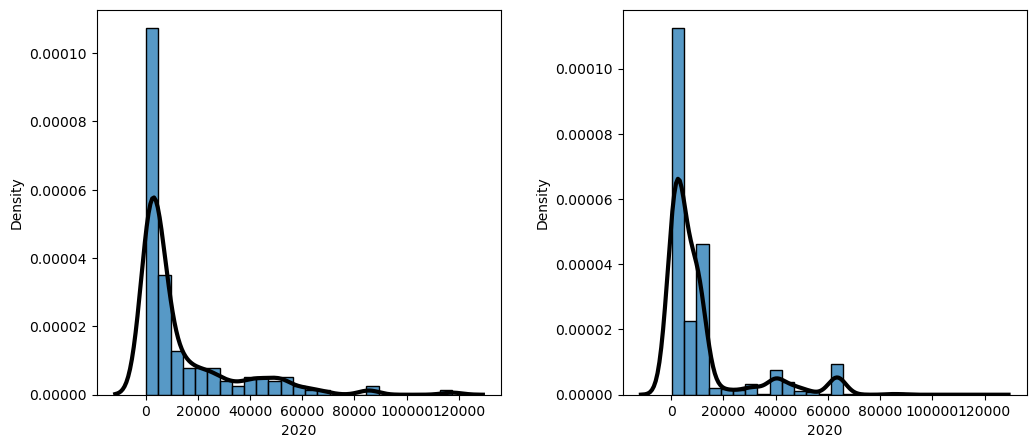

In [509]:
#Compare weighted vs. unweighted:
fig, ax1 = plt.subplots(1,2, figsize=(12, 5))

N = 25
#Unweighted:
#Note that bw_method can be 'scott', 'silverman', or a specific number; default is 'scott'
sns.histplot(data=gdf_merged2_noNaN, x="2020", bins=N, ax=ax1[0], stat="density")
sns.kdeplot(data=gdf_merged2_noNaN, x="2020", ax=ax1[0], color='black', linewidth=3, bw_method=.2)


#Weighted:
sns.histplot(data=gdf_merged2_noNaN, x="2020", weights='pop_est', bins=N, ax=ax1[1], stat="density")
sns.kdeplot(data=gdf_merged2_noNaN, x="2020", weights='pop_est', ax=ax1[1], color='black', linewidth=3, bw_method=.2) #'silverman')

plt.subplots_adjust(wspace=.3)

## Linear Regression using scikit-learn

- We'll skip the train/test split, etc., and just get the basic idea...

In [142]:
#Get the LinearRegression model
from sklearn.linear_model import LinearRegression

#And prep our data:
#Get our X and y as a single dataframe:
Xy = gdf_merged2[['2020', 'Value']]

#Let's also sort by '2020':
Xy = Xy.sort_values(by = '2020')

#And drop any observations with NaN in either column (there can be better ways to deal with NaNs)
Xy.dropna()

,2020,Value
32,5304.289129,5.7
25,5741.641249,4.9
29,6923.700197,6.1
124,8561.064333,4.9
27,8654.997325,6.0
18,10194.441410,5.5
34,12179.256670,6.3
10,13165.386340,6.2
113,15816.820400,6.1
115,16125.609410,6.0


In [150]:
#Get X and y:
X = Xy.dropna()['2020']
y = Xy.dropna()['Value']

In [151]:
#Make our model and train:
model = LinearRegression()

#If we try just this, we get an error:
model.fit(X, y)

ValueError: Expected 2D array, got 1D array instead:
array=[  5304.289129   5741.641249   6923.700197   8561.064333   8654.997325
  10194.44141   12179.25667   13165.38634   15816.8204    16125.60941
  17658.9473    18207.13964   19551.62116   20363.92441   22242.40642
  22992.87938   23595.24368   25545.241     26959.67544   31721.29802
  31918.69349   39055.28293   39986.92863   40318.41692   41760.59478
  43349.67786   44846.7916    45517.90382   46772.82535   48809.22688
  49169.71934   51722.069     52162.57012   52837.90398   58813.79698
  60915.4244    63528.6343    68340.0181    85420.19086   85656.32267
 117370.4969  ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [152]:
#Extract our values and reshape:
X = X.values
X = X.reshape(-1,1)

In [153]:
X.shape

(41, 1)

In [154]:
#Now try:
model.fit(X, y)

LinearRegression()

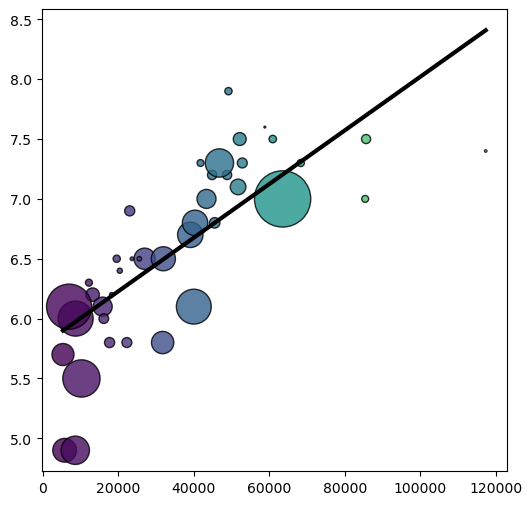

In [155]:
##Make some predictions and plot the result:
####

y_pred = model.predict(X)

#Plot:

fig, ax1 = plt.subplots(1,1, figsize=(6, 6))

#Note, we size by population and color by GDP:
ax1.scatter(gdf_merged2['2020'], gdf_merged2.Value, s=gdf_merged2.pop_est/2e5, c=gdf_merged2['2020'], edgecolor='black', alpha=.8)

ax1.plot(X, y_pred, linewidth=3, color='black')

### But, let's add weights

In [156]:
#With weights:

#And prep our data again:
Xy = gdf_merged2[['2020', 'Value', 'pop_est']]

Xy = Xy.sort_values(by='2020')

#Get X and y:
X = Xy.dropna()['2020']
y = Xy.dropna()['Value']
pop = Xy.dropna()['pop_est']

X = X.values
X = X.reshape(-1,1)

#Fit with weights:
model.fit(X, y, sample_weight = pop)

LinearRegression()

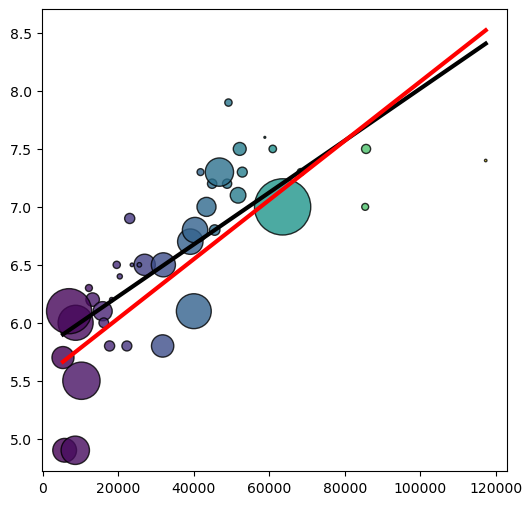

In [157]:
##Make some predictions and plot the result:
####

y_pred_weighted = model.predict(X)

#Plot:

fig, ax1 = plt.subplots(1,1, figsize=(6, 6))

#Note, we size by population and color by GDP:
ax1.scatter(gdf_merged2['2020'], gdf_merged2.Value, s=gdf_merged2.pop_est/2e5, c=gdf_merged2['2020'], edgecolor='black', alpha=.8)

ax1.plot(X, y_pred, linewidth=3, color='black')
ax1.plot(X, y_pred_weighted, linewidth=3, color='red')